## Compute the energy of the events

Here, we will compute the energy of the first trace of each events to extract features.

In [1]:
from tqdm.notebook import tqdm

import analysis
import catalog
import energy

tqdm.pandas()
catalog.display_parameters()

## Load catalog

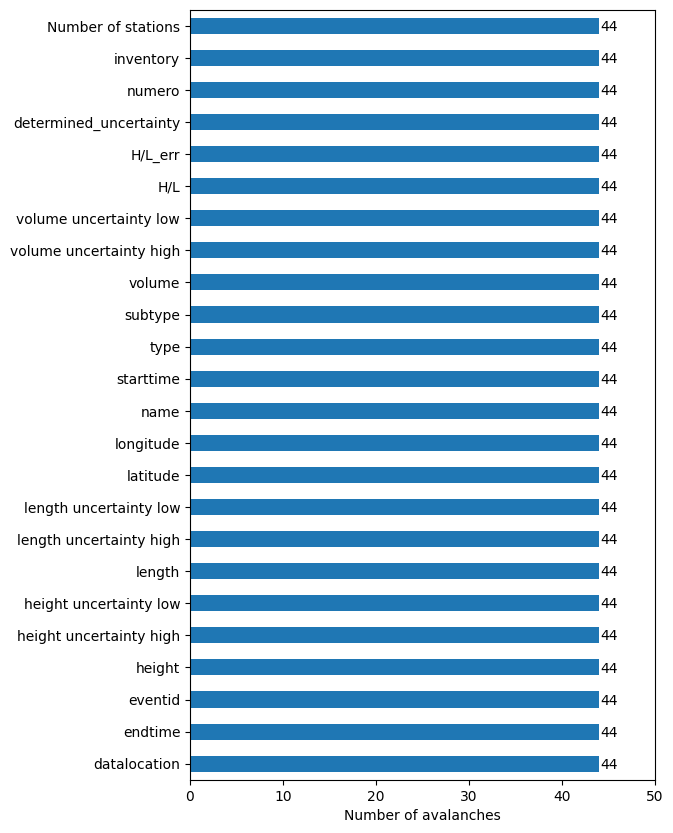

In [2]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_44.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=50)

  0%|          | 0/44 [00:00<?, ?it/s]

-------------------------
Event number 0
-------------------------


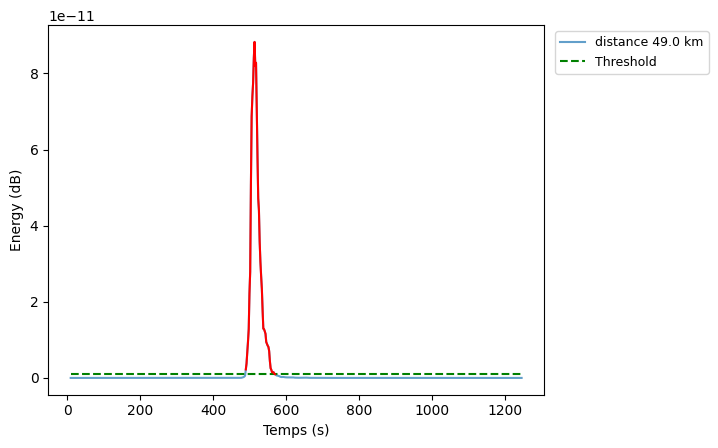

-------------------------
Event number 1
-------------------------


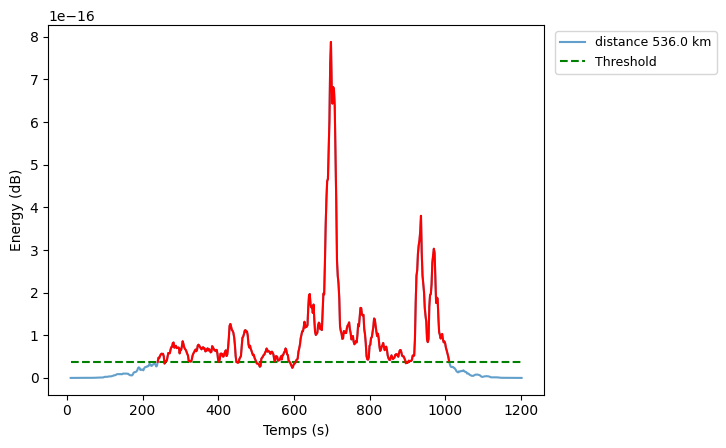

-------------------------
Event number 2
-------------------------


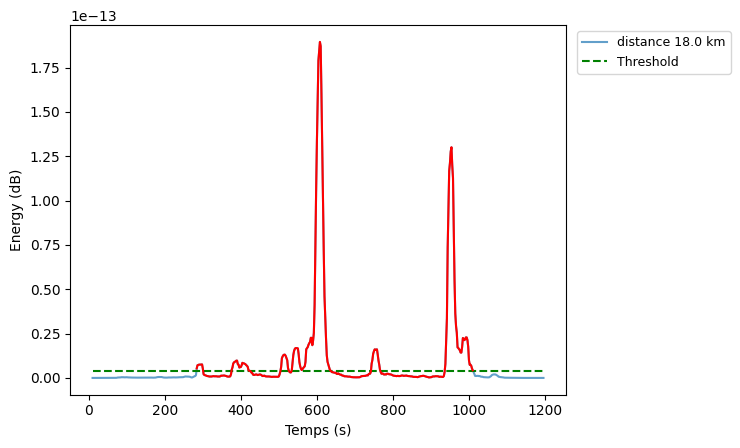

-------------------------
Event number 3
-------------------------


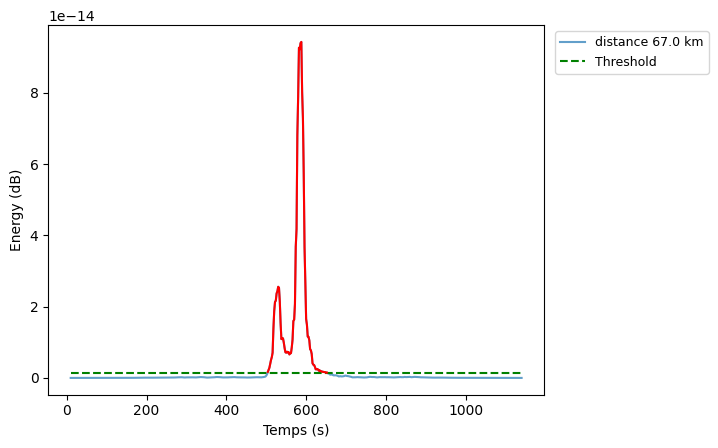

-------------------------
Event number 5
-------------------------


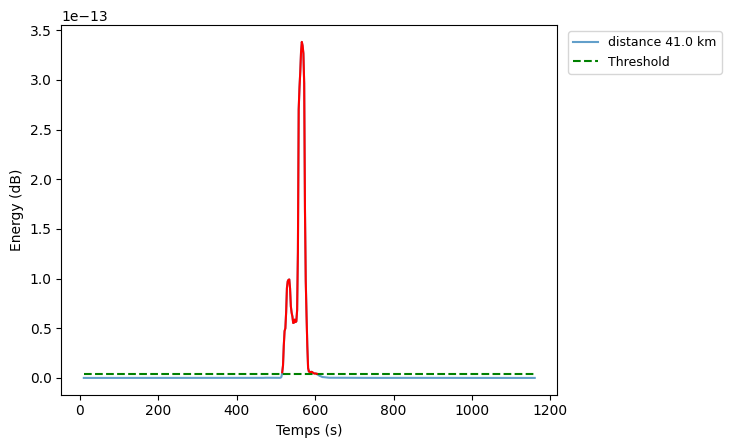

-------------------------
Event number 6
-------------------------


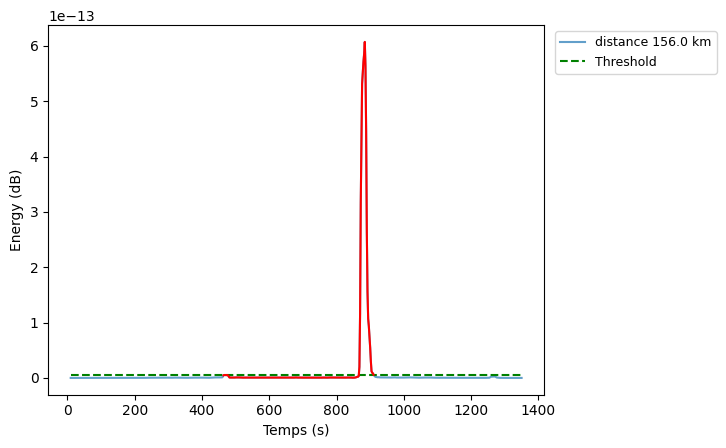

-------------------------
Event number 8
-------------------------


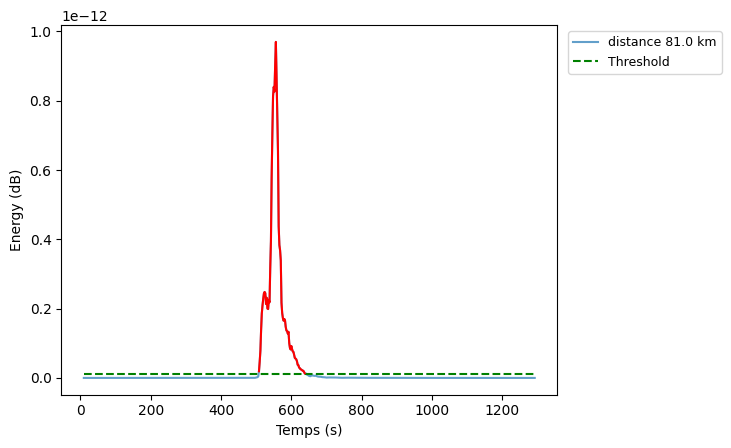

-------------------------
Event number 9
-------------------------


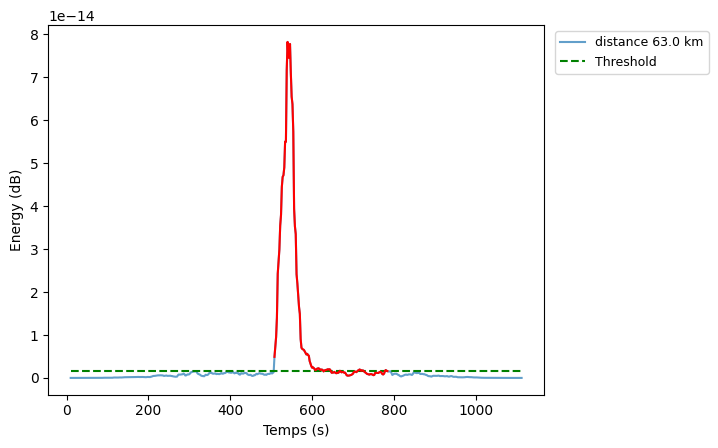

-------------------------
Event number 10
-------------------------


In [3]:
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):

    #if event_index == 0: ## Uncomment this line if you want to see a specific event

        print("-------------------------")
        print("Event number", event_index)
        print("-------------------------")
        
        ## Filter the stream 
        _, stream, _ = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5)

        ## Keep only the first station
        trace = stream[0]
    
        ## Compute the energy and extract features in a dataframe
        energy.compute(ESEC_avalanches, trace, event_index)

## Delete events with incorrectly calculated energy

In [ ]:
events_to_remove = []
ESEC_avalanches = ESEC_avalanches.drop(events_to_remove, axis=0)

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=50)

ESEC_avalanches.to_pickle("catalog/8_ESEC_avalanches_41.pickle")